### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')
data.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [3]:
print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")
data.info()

Rows: 12684, Columns: 26
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar        

2. Investigate the dataset for missing or problematic data.

In [4]:
data.rename(columns={'passanger': 'passenger'}, inplace=True)

missing = data.isnull().sum()
print("\nMissing values per column:")
print(missing[missing > 0])

missing_percent = (missing / len(data)) * 100
print("\nPercentage of missing values:")
print(missing_percent)




Missing values per column:
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
dtype: int64

Percentage of missing values:
destination              0.000000
passenger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000


3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
# Drop the 'car' column because it's 99% missing and not useful
data.drop(columns=['car'], inplace=True)

# Define the columns that contain frequency-like categorical data
freq_columns = [
    'Bar', 'CoffeeHouse', 'CarryAway',
    'RestaurantLessThan20', 'Restaurant20To50'
]

# For each column, fill missing values with the mode value
for col in freq_columns:
    mode_val = data[col].mode()[0]  # Find most common category
    data[col] = data[col].fillna(mode_val)  # Fill missing with mode

    # Optional: print what was used
    print(f"Filled missing values in '{col}' with mode: {mode_val}")

# Double-check that no missing values remain
total_missing = data.isnull().sum().sum()
print("\nTotal missing values remaining in dataset:", total_missing)    

Filled missing values in 'Bar' with mode: never
Filled missing values in 'CoffeeHouse' with mode: less1
Filled missing values in 'CarryAway' with mode: 1~3
Filled missing values in 'RestaurantLessThan20' with mode: 1~3
Filled missing values in 'Restaurant20To50' with mode: less1

Total missing values remaining in dataset: 0


4. What proportion of the total observations chose to accept the coupon?



In [6]:
# Average acceptance rate
acceptance_rate = data['Y'].mean()
print(f"Average acceptance rate: {acceptance_rate:.2%}")

Average acceptance rate: 56.84%


5. Use a bar plot to visualize the `coupon` column.

<Figure size 1000x600 with 0 Axes>

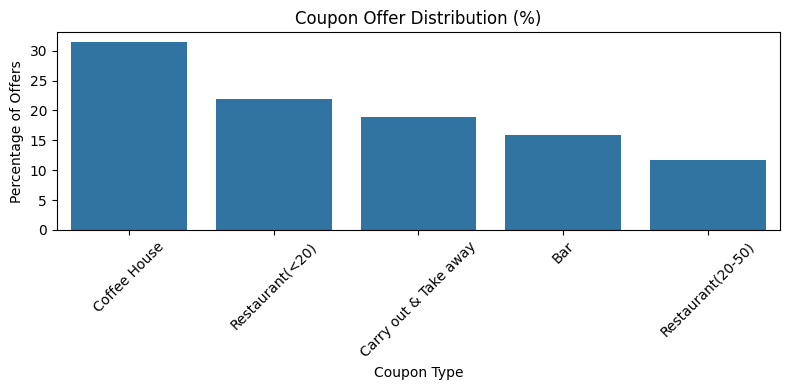

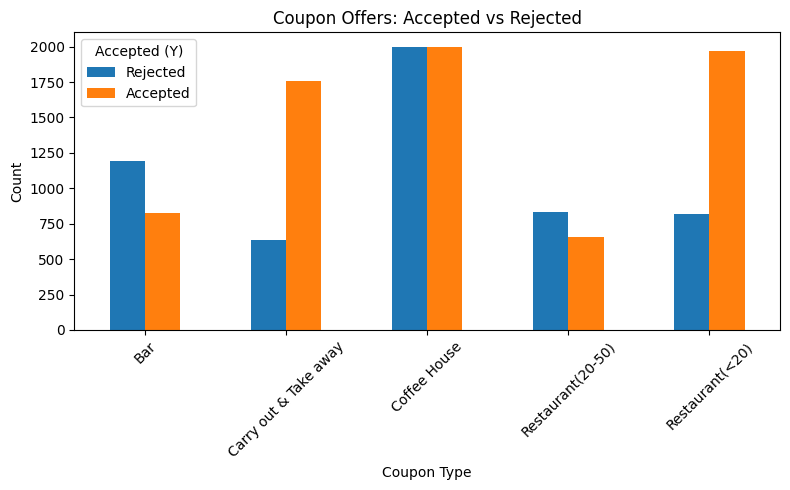

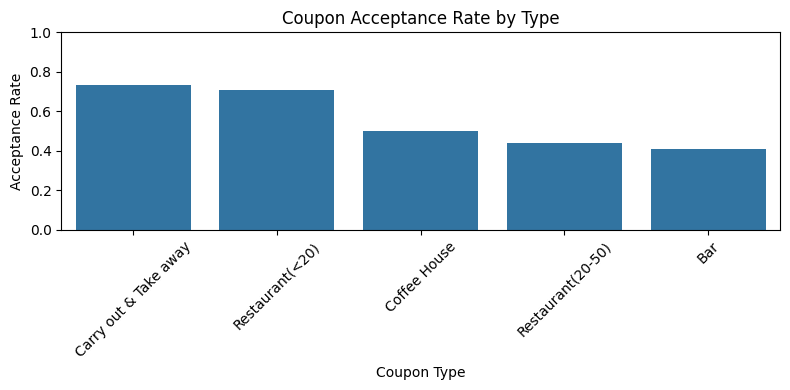

In [7]:
plt.figure(figsize=(10, 6))

coupon_pct = data['coupon'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 4))
sns.barplot(x=coupon_pct.index, y=coupon_pct.values)
plt.title("Coupon Offer Distribution (%)")
plt.xlabel("Coupon Type")
plt.ylabel("Percentage of Offers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('images/coupon_offer_distribution.png')
plt.show()

# Create counts grouped by coupon type and acceptance
coupon_counts = data.groupby(['coupon', 'Y']).size().unstack()

coupon_counts.plot(kind='bar', figsize=(8, 5))
plt.title("Coupon Offers: Accepted vs Rejected")
plt.xlabel("Coupon Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Accepted (Y)', labels=['Rejected', 'Accepted'])
plt.tight_layout()
plt.savefig('images/coupon_offers_accepted_rejected_count.png')
plt.show()

acceptance_rates = data.groupby('coupon')['Y'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x=acceptance_rates.index, y=acceptance_rates.values)
plt.title("Coupon Acceptance Rate by Type")
plt.xlabel("Coupon Type")
plt.ylabel("Acceptance Rate")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('images/coupon_acceptance_rate_by_type.png')
plt.show()


6. Use a histogram to visualize the temperature column.

Unique values in temperature column: [55 80 30]


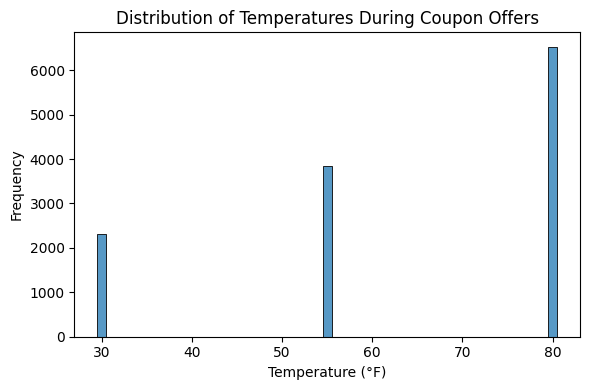

In [8]:
print("Unique values in temperature column:", data['temperature'].unique())

plt.figure(figsize=(6, 4))

# Plot a histogram of the temperature column
sns.histplot(data=data, x='temperature', bins=3, discrete=True)

# Add labels and title
plt.title("Distribution of Temperatures During Coupon Offers")
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig('images/temperature_distribution_histogram.png')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [9]:
coupons_data = data[data['coupon'] == 'Bar']
coupons_data.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [10]:
acceptance_rate_bar = coupons_data['Y'].mean()
print(f"Acceptance rate for bar coupons: {acceptance_rate_bar:.2%}")

Acceptance rate for bar coupons: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [11]:
#print("Unique values in Bar column:", coupons_data['Bar'].unique())
three_or_less = ['never', 'less1', '1~3']
more_than_three = ['4~8', 'gt8']

rate_low = coupons_data[coupons_data['Bar'].isin(three_or_less)]['Y'].mean()
rate_high = coupons_data[coupons_data['Bar'].isin(more_than_three)]['Y'].mean()

print(f"Acceptance rate (3 or fewer times/month): {rate_low:.2%}")
print(f"Acceptance rate (More than 3 times/month): {rate_high:.2%}")

Acceptance rate (3 or fewer times/month): 37.07%
Acceptance rate (More than 3 times/month): 76.88%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [12]:
#print("Unique values in age column:", coupons_data['age'].unique())

bar_more_than_once = ['1~3', '4~8', 'gt8']
age_over_25 = ['26', '31', '36', '41', '46', '50plus']

# Target group: bar > once/month AND age > 25
target_group = coupons_data[
    (coupons_data['Bar'].isin(bar_more_than_once)) &
    (coupons_data['age'].isin(age_over_25))
]

# Create another group except with the ones in target group
other_group = coupons_data.drop(target_group.index)

rate_target = target_group['Y'].mean()
rate_other = other_group['Y'].mean()

print(f"Acceptance rate (Bar more than once/month & over the Age of 25): {rate_target:.2%}")
print(f"Acceptance rate (Everyone else): {rate_other:.2%}")

Acceptance rate (Bar more than once/month & over the Age of 25): 69.52%
Acceptance rate (Everyone else): 33.50%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [13]:

#print("Unique values in 'passenger':", coupons_data['passenger'].unique())
#print("Unique values in 'occupation':", coupons_data['occupation'].unique())

target_group = coupons_data[
    (coupons_data['Bar'].isin(bar_more_than_once)) &
    (coupons_data['passenger'] != 'Kid(s)') &
    (coupons_data['occupation'] != 'Farming Fishing & Forestry')
]

other_group = coupons_data.drop(target_group.index)

rate_target = target_group['Y'].mean()
rate_other = other_group['Y'].mean()

print("\n")
print(f"Acceptance rate (Bar more than once/month, not with kids, not in farming): {rate_target:.2%}")
print(f"Acceptance rate (Everyone else): {rate_other:.2%}")



Acceptance rate (Bar more than once/month, not with kids, not in farming): 71.32%
Acceptance rate (Everyone else): 29.60%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [14]:
#print("Unique values in 'maritalStatus':", coupons_data['maritalStatus'].unique())
#print("Unique values in 'occupation':", coupons_data['occupation'].unique())
#print("Unique values in age column:", coupons_data['age'].unique())
#print("Unique values in income column:", coupons_data['income'].unique())
#print("Unique values in RestaurantLessThan20 column:", coupons_data['RestaurantLessThan20'].unique())
#coupons_data.info()

bar_more_than_once = ['1~3', '4~8', 'gt8']
age_under_30 = ['below21', '21', '26']
cheap_restaurant_often = ['4~8', 'gt8']
low_income = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']

group_a = coupons_data[
    (coupons_data['Bar'].isin(bar_more_than_once)) &
    (coupons_data['passenger'] != 'Kid(s)') &
    (coupons_data['maritalStatus'] != 'Widowed')
]
rate_a = group_a['Y'].mean()

# ---- Group B ----
group_b = coupons_data[
    (coupons_data['Bar'].isin(bar_more_than_once)) &
    (coupons_data['age'].isin(age_under_30))
]
rate_b = group_b['Y'].mean()

# ---- Group C ----
group_c = coupons_data[
    (coupons_data['RestaurantLessThan20'].isin(cheap_restaurant_often)) &
    (coupons_data['income'].isin(low_income))
]
rate_c = group_c['Y'].mean()

print("Acceptance Rates by Target Group:")
print("-" * 50)
print(f"Group A (Bar > once/month, no kids, not widowed):   {rate_a:.2%}")
print(f"Group B (Bar > once/month AND under 30):           {rate_b:.2%}")
print(f"Group C (Cheap dining > 4x/month AND income < 50K): {rate_c:.2%}")
print("-" * 50)

Acceptance Rates by Target Group:
--------------------------------------------------
Group A (Bar > once/month, no kids, not widowed):   71.32%
Group B (Bar > once/month AND under 30):           72.17%
Group C (Cheap dining > 4x/month AND income < 50K): 45.35%
--------------------------------------------------


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

## 🧠 Final Hypothesis: What Influences Bar Coupon Acceptance?

Drivers are significantly more likely to accept bar coupons when their **behavioral patterns** and **demographics** indicate social activity, age flexibility, or cost-consciousness.

---

### 🔹 Key Insights from Analysis

| Segment | Description | Acceptance Rate |
|--------|-------------|-----------------|
| **Baseline** | All bar coupon recipients | **41.00%** |
| **High Bar Frequency** | Visit bars > 3 times/month | **76.88%** |
| **Older Regulars** | Visit bars > once/month & Age > 25 | **69.52%** |
| **Filtered Adults** | Bar-goers (no kids, not in farming) | **71.32%** |
| **Younger Adults** | Bar-goers under 30 | **72.17%** |
| **Price-Conscious Diners** | Eat cheap >4x/month & income < $50K | **45.35%** |

---

### 🎯 Final Inference

Bar coupon acceptance is primarily driven by:

- **Behavioral habits** (frequent bar/restaurant visits)
- **Life flexibility** (no kids, not widowed, not in rigid occupations)
- **Age** (younger and socially active demographics respond more)
- **Financial awareness** (value-seeking lower-income diners)

Targeting these distinct user profiles can **nearly double** engagement compared to the baseline.

---

### 📊 Visual Summary

The bar chart below compares acceptance rates for each group against the overall baseline rate:

> _“Bar Coupon Acceptance Rate by Driver Segment”_  
*(see chart in the next output cell)*

This visual clearly shows that **targeted segments significantly outperform the general population**, providing strong direction for data-driven marketing.

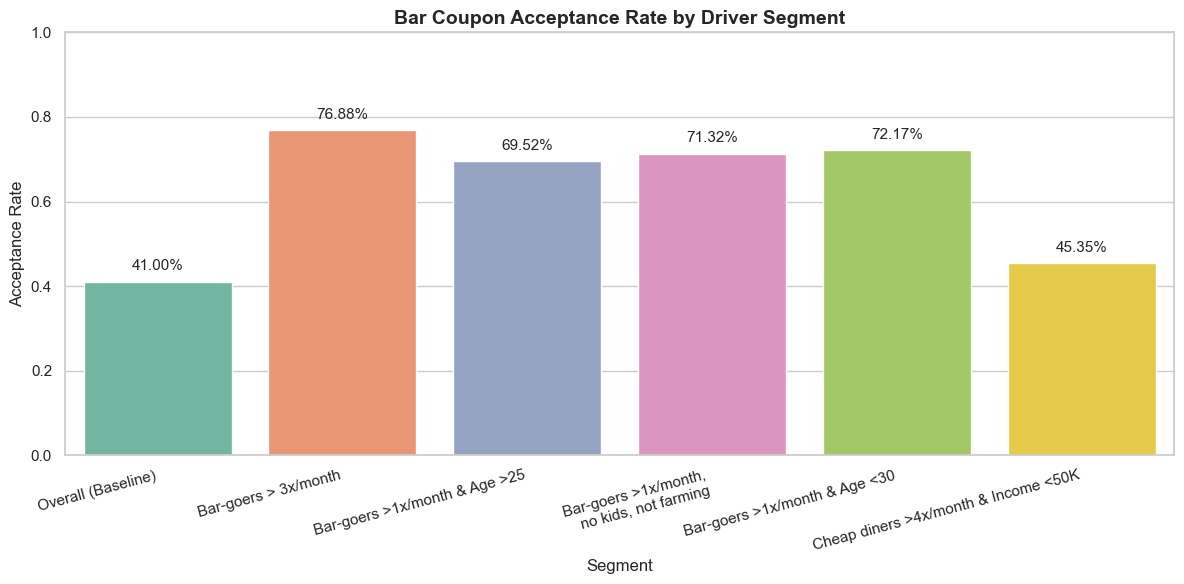

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set Seaborn theme
sns.set(style='whitegrid')

# Data
segments = [
    "Overall (Baseline)",
    "Bar-goers > 3x/month",
    "Bar-goers >1x/month & Age >25",
    "Bar-goers >1x/month,\nno kids, not farming",
    "Bar-goers >1x/month & Age <30",
    "Cheap diners >4x/month & Income <50K"
]

acceptance_rates = [
    0.4100,  # Baseline
    0.7688,  # Problem 3
    0.6952,  # Problem 4
    0.7132,  # Problem 5
    0.7217,  # Problem 6 - Group B
    0.4535   # Problem 6 - Group C
]

# DataFrame
plot_df = pd.DataFrame({
    'Segment': segments,
    'Acceptance Rate': acceptance_rates
})

# Plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=plot_df,
    x='Segment',
    y='Acceptance Rate',
    hue='Segment',          # assign hue to match palette usage
    palette='Set2',
    legend=False            # suppress automatic legend
)

# Annotate bars with percentage labels
for i, rate in enumerate(acceptance_rates):
    barplot.text(i, rate + 0.02, f"{rate:.2%}", ha='center', va='bottom', fontsize=11)

# Titles and labels
plt.title("Bar Coupon Acceptance Rate by Driver Segment", fontsize=14, weight='bold')
plt.ylabel("Acceptance Rate")
plt.ylim(0, 1)
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.savefig('images/bar_coupon_acceptance_segments.png')
plt.show()

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [16]:
takeout_data = data[data['coupon'] == 'Carry out & Take away']
print("Number of records for 'Carry out & Take away':", takeout_data.shape[0])
print("Unique values in 'passenger':", takeout_data['passenger'].unique())
print("Unique values in time):", takeout_data['time'].unique())

Number of records for 'Carry out & Take away': 2393
Unique values in 'passenger': ['Friend(s)' 'Kid(s)' 'Alone' 'Partner']
Unique values in time): ['10AM' '2PM' '7AM' '10PM' '6PM']


In [17]:
acceptance_rate = takeout_data['Y'].mean()
print(f"Overall acceptance rate for 'Carry out & Take away' coupons: {acceptance_rate:.2%}")

Overall acceptance rate for 'Carry out & Take away' coupons: 73.55%


In [18]:
# Acceptance rate by time
time_summary = takeout_data.groupby('time').agg(
    acceptance_rate=('Y', 'mean'),
    count=('Y', 'count')
).reset_index()

# Format acceptance rate
time_summary['acceptance_rate'] = time_summary['acceptance_rate'].apply(lambda x: f"{x:.2%}")
time_summary = time_summary.sort_values(by='time')  # for better visual order if time is like '10AM', '2PM' etc.

time_summary

,time,acceptance_rate,count
0,10AM,70.21%,517
1,10PM,75.92%,461
2,2PM,86.70%,218
3,6PM,82.53%,435
4,7AM,65.49%,762


In [19]:
# Acceptance rate by destination
dest_summary = takeout_data.groupby('destination').agg(
    acceptance_rate=('Y', 'mean'),
    count=('Y', 'count')
).reset_index()

# Format acceptance rate
dest_summary['acceptance_rate'] = dest_summary['acceptance_rate'].apply(lambda x: f"{x:.2%}")
dest_summary

,destination,acceptance_rate,count
0,Home,78.87%,653
1,No Urgent Place,76.28%,978
2,Work,65.49%,762


In [20]:
# Group by both 'time' and 'destination' and calculate acceptance rate and count
time_dest_summary = takeout_data.groupby(['time', 'destination']).agg(
    acceptance_rate=('Y', 'mean'),
    count=('Y', 'count')
).reset_index()

# Format acceptance rate for display
time_dest_summary['formatted_rate'] = time_dest_summary['acceptance_rate'].apply(lambda x: f"{x:.2%}")

# Pivot for better readability and visualization
pivot_table = time_dest_summary.pivot(index='time', columns='destination', values='acceptance_rate')

pivot_table

destination,Home,No Urgent Place,Work
time,,,
10AM,NaN,0.702128,NaN
10PM,0.746429,0.779006,NaN
2PM,NaN,0.866972,NaN
6PM,0.820375,0.854839,NaN
7AM,NaN,NaN,0.654856


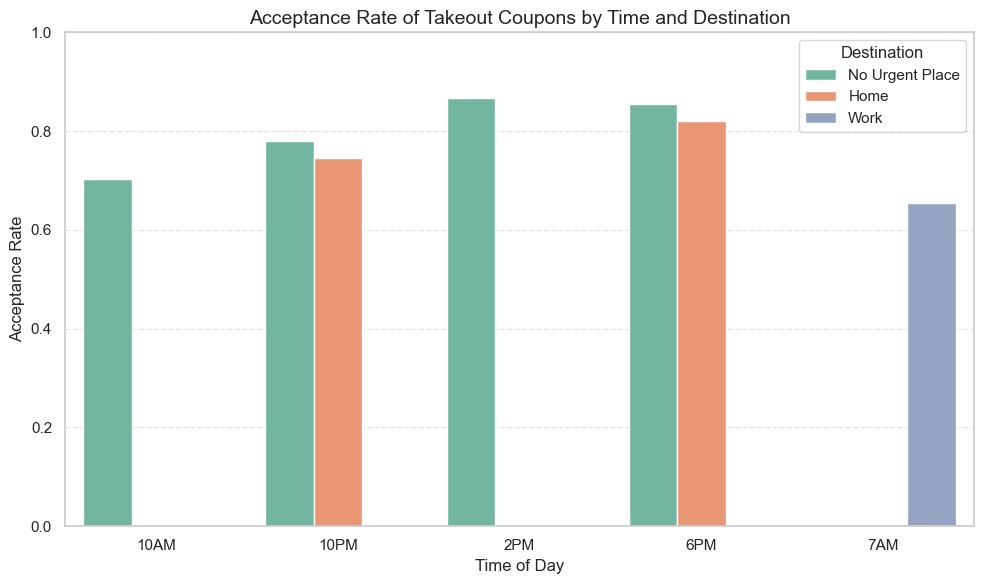

In [21]:

# Prepare a filtered dataset without NaNs for plotting
plot_data = time_dest_summary.dropna(subset=['acceptance_rate'])

# Set up the plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=plot_data,
    x='time',
    y='acceptance_rate',
    hue='destination',
    palette='Set2'
)

# Customize the plot
plt.title('Acceptance Rate of Takeout Coupons by Time and Destination', fontsize=14)
plt.xlabel('Time of Day')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)  # acceptance_rate is between 0 and 1
plt.legend(title='Destination')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('images/takeout_time_destination_acceptance.png')
plt.show()

### Time × Destination Analysis – Key Insight

We analyzed how the time of day and the driver's destination interact to influence the acceptance of **Carry out & Take away** coupons.

#### Key Observations:
- **Lowest acceptance** was seen at **7AM for drivers heading to Work** (65.5%), likely due to a lack of time or urgency to reach the office.
- **Highest acceptance rates** occurred at **2PM and 6PM**, especially for those heading to **No Urgent Place** or **Home**, with acceptance exceeding **85%**.
- Drivers during **evening hours (10PM)** heading to **Home or No Urgent Place** also showed **strong acceptance rates** (~75–78%).

#### Interpretation:
Drivers who are not in a hurry (e.g., going home or to a non-urgent place) and traveling during mid-day or evening hours are more receptive to takeout coupons. Conversely, those on their way to work early in the morning tend to ignore them.

This suggests that **targeting takeout coupons based on time and destination can improve engagement**, especially by avoiding early work commute hours.

In [22]:
# Acceptance rate by education level
education_summary = takeout_data.groupby('education').agg(
    acceptance_rate=('Y', 'mean'),
    count=('Y', 'count')
).reset_index()

# Format acceptance rate as percentage
education_summary['acceptance_rate'] = education_summary['acceptance_rate'].apply(lambda x: f"{x:.2%}")
education_summary

,education,acceptance_rate,count
0,Associates degree,81.74%,219
1,Bachelors degree,71.43%,812
2,Graduate degree (Masters or Doctorate),65.36%,358
3,High School Graduate,74.59%,181
4,Some High School,93.75%,16
5,Some college - no degree,76.46%,807


In [23]:
# Acceptance rate by occupation
occupation_summary = takeout_data.groupby('occupation').agg(
    acceptance_rate=('Y', 'mean'),
    count=('Y', 'count')
).reset_index()

# Format acceptance rate for display
occupation_summary['acceptance_rate'] = occupation_summary['acceptance_rate'].apply(lambda x: f"{x:.2%}")
occupation_summary = occupation_summary.sort_values(by='acceptance_rate', ascending=False)

occupation_summary

,occupation,acceptance_rate,count
19,Protective Service,96.77%,31
6,Construction & Extraction,96.43%,28
10,Healthcare Practitioners & Technical,88.89%,45
11,Healthcare Support,83.33%,48
9,Food Preparation & Serving Related,82.54%,63
3,Business & Financial,81.73%,104
23,Transportation & Material Moving,81.58%,38
8,Farming Fishing & Forestry,80.00%,10
15,Management,78.77%,146
16,Office & Administrative Support,77.24%,123


In [24]:
# Group by both 'education' and 'occupation' and calculate acceptance rate and count
edu_occ_summary = takeout_data.groupby(['education', 'occupation']).agg(
    acceptance_rate=('Y', 'mean'),
    count=('Y', 'count')
).reset_index()

# Filter rows with very low counts (e.g., less than 10) to avoid misleading rates
edu_occ_summary = edu_occ_summary[edu_occ_summary['count'] >= 10]

# Pivot the table for better visualization
pivot_edu_occ = edu_occ_summary.pivot(index='education', columns='occupation', values='acceptance_rate')

pivot_edu_occ

occupation,Architecture & Engineering,Arts Design Entertainment Sports & Media,Business & Financial,Community & Social Services,Computer & Mathematical,Construction & Extraction,Education&Training&Library,Food Preparation & Serving Related,Healthcare Practitioners & Technical,Healthcare Support,...,Management,Office & Administrative Support,Personal Care & Service,Production Occupations,Protective Service,Retired,Sales & Related,Student,Transportation & Material Moving,Unemployed
education,,,,,,,,,,,,,,,,,,,,,
Associates degree,NaN,0.600000,NaN,NaN,0.777778,NaN,NaN,NaN,NaN,NaN,...,0.782609,0.909091,NaN,NaN,NaN,0.750000,0.600000,1.000000,NaN,0.918033
Bachelors degree,0.636364,0.534884,0.854545,0.629630,0.707071,NaN,0.780488,1.000000,NaN,NaN,...,0.735849,0.710526,0.529412,NaN,NaN,0.740741,0.722892,0.736111,NaN,0.651376
Graduate degree (Masters or Doctorate),NaN,NaN,0.636364,0.823529,0.673077,NaN,0.650000,NaN,0.913043,NaN,...,0.850000,NaN,NaN,NaN,NaN,0.703704,0.500000,0.304348,NaN,0.750000
High School Graduate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.666667,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,0.722222,0.722222,0.714286,NaN,0.744681
Some college - no degree,NaN,0.725000,0.900000,NaN,0.756410,0.958333,0.655172,0.818182,NaN,0.842105,...,0.772727,0.797101,0.950000,0.8125,0.947368,NaN,0.779221,0.675978,0.954545,0.754717


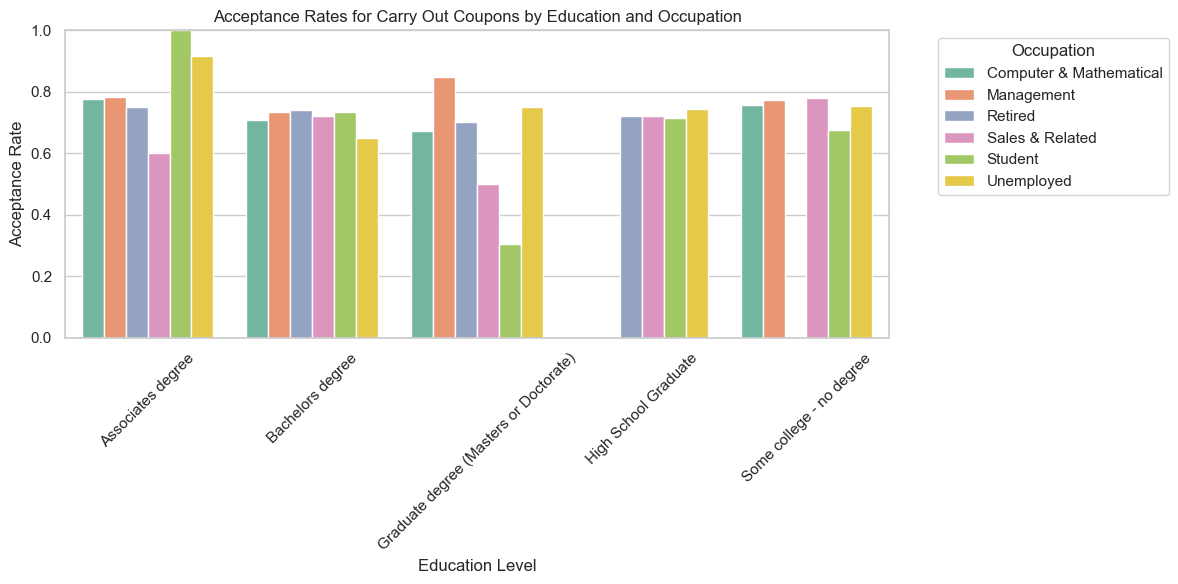

In [25]:
# Keep only relevant occupations for clarity (optional: top N by total count or interest)
selected_occupations = edu_occ_summary['occupation'].value_counts().index[:6].tolist()

# Filter the dataset to include only selected occupations
filtered_plot_data = edu_occ_summary[edu_occ_summary['occupation'].isin(selected_occupations)]

# Set up the plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=filtered_plot_data,
    x='education',
    y='acceptance_rate',
    hue='occupation',
    palette='Set2'
)

# Customize the plot
plt.title('Acceptance Rates for Carry Out Coupons by Education and Occupation')
plt.xlabel('Education Level')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45)
plt.legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig('images/takeout_education_occupation_acceptance.png')
plt.show()

### Education × Occupation – Acceptance Behavior Insights

We analyzed how coupon acceptance for **Carry Out & Take Away** varies based on a combination of **education level** and **occupation**. This helps understand whether an individual's educational background influences their decision to accept a coupon within their professional role.

#### Key Observations:
- Individuals with **some college education** or an **Associate’s degree** generally showed **higher acceptance rates** across many occupations.
- Occupations such as:
  - **Office & Administrative Support**
  - **Management**
  - **Food Preparation & Serving**
  - **Protective Services**
  show consistently **high coupon engagement** across most education levels.
- Those in **Computer & Mathematical** or **Sales** roles also showed relatively strong acceptance, particularly at the **Bachelors and Associates levels**.
- Acceptance rates tend to dip for **Graduate-level professionals** in some categories like **Legal**, **Science**, or **Entertainment**, suggesting that either higher income or differing preferences reduce their response to these offers.

#### Interpretation:
There is a **behavioral alignment between middle-income, service-related occupations and coupon responsiveness**, especially when combined with mid-tier education levels. These groups may be more budget-conscious or opportunistic in everyday decisions like food purchases.

**Marketers could prioritize targeting working professionals with associate or bachelor degrees in service industries** for takeout coupon promotions.